### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [256]:
ingresoTotalT1 = tienda["Precio"].sum()- tienda["Costo de envío"].sum()
ingresoTotalT2 = tienda2["Precio"].sum()- tienda2["Costo de envío"].sum()
ingresoTotalT3 = tienda3["Precio"].sum()- tienda4["Costo de envío"].sum()
ingresoTotalT4 = tienda4["Precio"].sum()- tienda4["Costo de envío"].sum()
costoEnvioT1 = tienda["Costo de envío"].sum()
costoEnvioT2 = tienda2["Costo de envío"].sum()
costoEnvioT3 = tienda3["Costo de envío"].sum()
costoEnvioT4 = tienda4["Costo de envío"].sum()

In [257]:
print(f"El ingreso Total de la Tienda 1 es : S/.{ingresoTotalT1}")
print(f"El ingreso Total de la Tienda 2 es : S/.{ingresoTotalT2}")
print(f"El ingreso Total de la Tienda 3 es : S/.{ingresoTotalT3}")
print(f"El ingreso Total de la Tienda 4 es : S/.{ingresoTotalT4}")

El ingreso Total de la Tienda 1 es : S/.1089502500.0
El ingreso Total de la Tienda 2 es : S/.1056858400.0
El ingreso Total de la Tienda 3 es : S/.1042702200.0
El ingreso Total de la Tienda 4 es : S/.983058300.0


# 2. Ventas por categoría

In [234]:
ingresoCategoriaT1 =tienda.groupby("Categoría del Producto")["Precio"].sum()
ingresoCategoriaT2 =tienda2.groupby("Categoría del Producto")["Precio"].sum()
ingresoCategoriaT3 =tienda3.groupby("Categoría del Producto")["Precio"].sum()
ingresoCategoriaT4 =tienda4.groupby("Categoría del Producto")["Precio"].sum()
cantCategoriasT1 = tienda["Categoría del Producto"].value_counts(ascending=False)
cantCategoriasT2 = tienda2["Categoría del Producto"].value_counts(ascending=False)
cantCategoriasT3 = tienda3["Categoría del Producto"].value_counts(ascending=False)
cantCategoriasT4 = tienda4["Categoría del Producto"].value_counts(ascending=False)
#ingresoProductoT4 = tienda4.groupby(["Categoría del Producto", "Producto"])["Precio"].count().sort_values(ascending=False)
#ingresoProductoT4

In [265]:
Categorias_Mas_Ganancia = pd.concat([ingresoCategoriaT1,ingresoCategoriaT2,ingresoCategoriaT3,ingresoCategoriaT4],axis=1)
Categorias_Mas_Ganancia.columns = ("Tienda1","Tienda2","Tienda3","Tienda4")
#Categorias_Mas_Ganancia["Total"] = Categorias_Mas_Ganancia.sum(axis=1)
#Categorias_Mas_Ganancia["Total"] = Categorias_Mas_Ganancia["Total"].round(0).astype(int)
#Categorias_Mas_Ganancia = Categorias_Mas_Ganancia.sort_values(by="Total", ascending=False)
Categorias_Mas_Ganancia

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0
Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0
Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0
Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0
Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0
Juguetes,17995700.0,15945400.0,19401100.0,20262200.0
Libros,8784900.0,10091200.0,9498700.0,9321300.0
Muebles,187633700.0,176426300.0,201072100.0,192528900.0


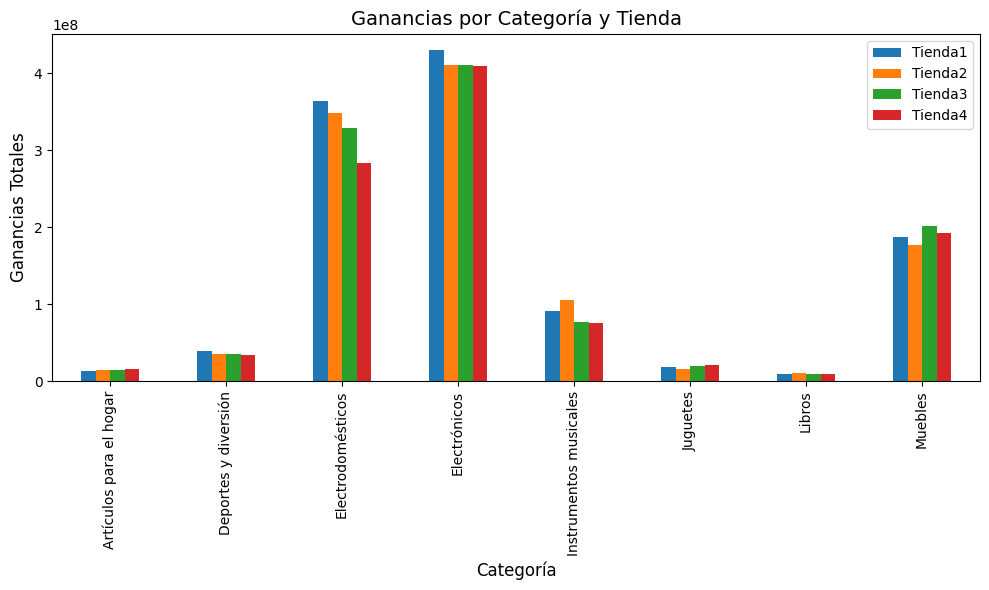

In [267]:
import matplotlib.pyplot as plt

# Crear gráfico de barras apiladas
ax = Categorias_Mas_Ganancia.plot(kind='bar', figsize=(10, 6))

# Títulos y etiquetas
ax.set_title("Ganancias por Categoría y Tienda", fontsize=14)
ax.set_xlabel("Categoría", fontsize=12)
ax.set_ylabel("Ganancias Totales", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [215]:
Categorias_Mas_Populares = pd.concat([cantCategoriasT1,cantCategoriasT2,cantCategoriasT3,cantCategoriasT4],axis=1).head(4)
Categorias_Mas_Populares.columns = ("Tienda1","Tienda2","Tienda3","Tienda4")
Categorias_Mas_Populares.loc["Total"] = Categorias_Mas_Populares.sum()
Categorias_Mas_Populares

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Total,1549,1482,1543,1523


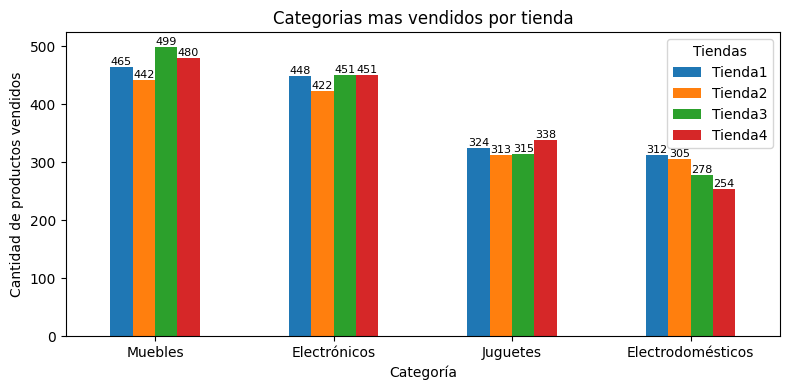

In [216]:
import matplotlib.pyplot as plt

# Excluimos la fila 'Total' para graficar solo las categorías
masPopulares = Categorias_Mas_Populares.drop("Total")

# Gráfico de barras agrupadas
et = masPopulares.plot(kind="bar", figsize=(8,4))
plt.title("Categorias mas vendidos por tienda")
plt.ylabel("Cantidad de productos vendidos")
plt.xlabel("Categoría")
plt.xticks(rotation=0)
plt.legend(title="Tiendas")
plt.tight_layout()

for container in et.containers:
    et.bar_label(container, label_type="edge", fontsize=8)

plt.show()

In [70]:
Categorias_Menos_Populares = pd.concat([cantCategoriasT1,cantCategoriasT2,cantCategoriasT3,cantCategoriasT4],axis=1).tail(3)
Categorias_Menos_Populares.columns = ("Tienda1","Tienda2","Tienda3","Tienda4",)
Categorias_Menos_Populares.loc["Total"] = Categorias_Menos_Populares.sum()
Categorias_Menos_Populares

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201
Total,526,602,539,558


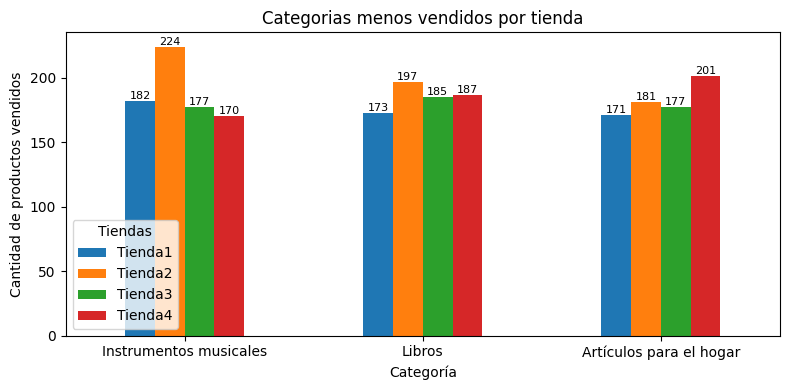

In [101]:
import matplotlib.pyplot as plt

# Excluimos la fila 'Total' para graficar solo las categorías
menosPopulares = Categorias_Menos_Populares.drop("Total")

# Gráfico de barras agrupadas
em = menosPopulares.plot(kind="bar", figsize=(8,4))
plt.title("Categorias menos vendidos por tienda")
plt.ylabel("Cantidad de productos vendidos")
plt.xlabel("Categoría")
plt.xticks(rotation=0)
plt.legend(title="Tiendas")
plt.tight_layout()

for container in em.containers:
    em.bar_label(container, label_type="edge", fontsize=8)

plt.show()

# 3. Calificación promedio de la tienda


In [104]:
calificacion_Promedio_T1 =round(tienda["Calificación"].mean(),2)
calificacion_Promedio_T2 =round(tienda2["Calificación"].mean(),2)
calificacion_Promedio_T3 =round(tienda3["Calificación"].mean(),2)
calificacion_Promedio_T4 =round(tienda4["Calificación"].mean(),2)
Calificacion = {"Tienda1" :calificacion_Promedio_T1,"Tienda2" :calificacion_Promedio_T2,"Tienda3" :calificacion_Promedio_T3,"Tienda4" :calificacion_Promedio_T4}
Calificacion

{'Tienda1': np.float64(3.98),
 'Tienda2': np.float64(4.04),
 'Tienda3': np.float64(4.05),
 'Tienda4': np.float64(4.0)}

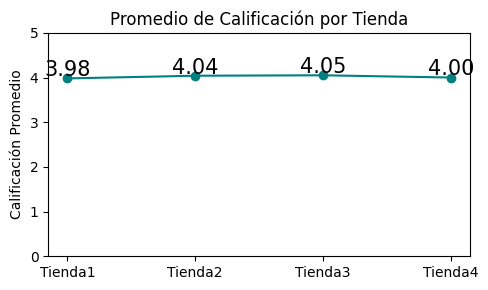

In [194]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(list(Calificacion.keys()), list(Calificacion.values()), marker='o', linestyle='-', color='teal')

ax.set_title("Promedio de Calificación por Tienda", fontsize=12)
ax.set_ylabel("Calificación Promedio", fontsize=10)
ax.set_ylim(0, 5)

for i, valor in enumerate(Calificacion.values()):
    ax.text(i, valor + 0.05, f"{valor:.2f}", ha='center', fontsize=15)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [111]:
productosVebndidosT1 = tienda["Producto"].value_counts(ascending=False)
productosVebndidosT2 = tienda2["Producto"].value_counts(ascending=False)
productosVebndidosT3 = tienda3["Producto"].value_counts(ascending=False)
productosVebndidosT4 = tienda4["Producto"].value_counts(ascending=False)


In [153]:
Top10_productos_Masvendidos = pd.concat([productosVebndidosT1,productosVebndidosT2,productosVebndidosT3,productosVebndidosT4],axis=1)
Top10_productos_Masvendidos.columns = ("Tienda1","Tienda2","Tienda3","Tienda4")
Top10_productos_Masvendidos["Total"] = Top10_productos_Masvendidos.sum(axis=1)
Top10_productos_Masvendidos = Top10_productos_Masvendidos.sort_values(by="Total", ascending=False)
Top10_productos_Masvendidos = Top10_productos_Masvendidos.head(5)
Top10_productos_Masvendidos

,Tienda1,Tienda2,Tienda3,Tienda4,Total
Producto,,,,,
Mesa de noche,56,44,55,55,210
Carrito de control remoto,52,47,52,55,206
Microondas,60,62,36,48,206
Batería,53,61,41,48,203
Cama king,44,45,56,56,201


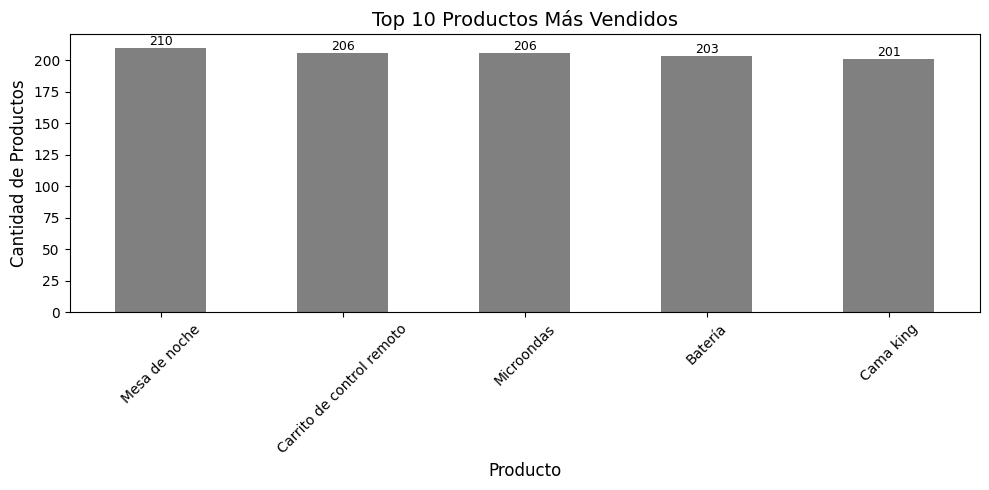

In [165]:
import matplotlib.pyplot as plt

ax = Top10_productos_Masvendidos["Total"].plot(kind="bar", figsize=(10,5), color='gray')
plt.title("Top 10 Productos Más Vendidos", fontsize=14)
plt.xlabel("Producto", fontsize=12)
plt.ylabel("Cantidad de Productos", fontsize=12)
plt.xticks(rotation=45)

# Agregar etiquetas con los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

In [157]:
Top10_productos_Menosvendidos = pd.concat([productosVebndidosT1,productosVebndidosT2,productosVebndidosT3,productosVebndidosT4],axis=1)
Top10_productos_Menosvendidos.columns = ("Tienda1","Tienda2","Tienda3","Tienda4")
Top10_productos_Menosvendidos["Total"] = Top10_productos_Menosvendidos.sum(axis=1)
Top10_productos_Menosvendidos = Top10_productos_Menosvendidos.sort_values(by="Total", ascending=False)
Top10_productos_Menosvendidos = Top10_productos_Menosvendidos.tail(5)
Top10_productos_Menosvendidos

,Tienda1,Tienda2,Tienda3,Tienda4,Total
Producto,,,,,
Ciencia de datos con Python,39,43,46,38,166
Guitarra eléctrica,47,47,38,33,165
Mochila,39,45,36,43,163
Auriculares con micrófono,33,44,39,42,158
Celular ABXY,33,41,44,39,157


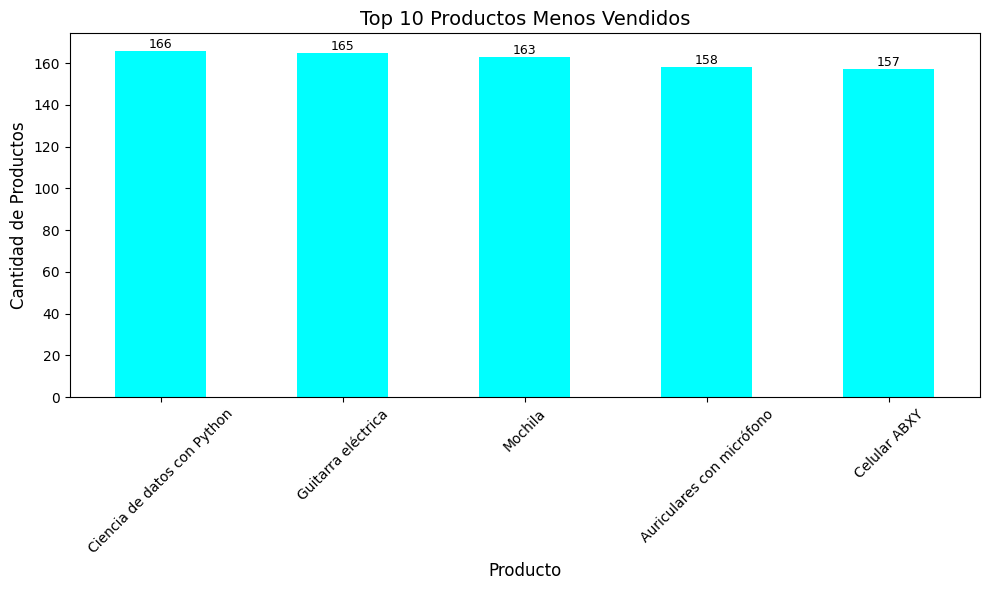

In [162]:
import matplotlib.pyplot as plt

ax = Top10_productos_Menosvendidos["Total"].plot(kind="bar", figsize=(10,6), color='cyan')
plt.title("Top 10 Productos Menos Vendidos", fontsize=14)
plt.xlabel("Producto", fontsize=12)
plt.ylabel("Cantidad de Productos", fontsize=12)
plt.xticks(rotation=45)

# Agregar etiquetas con los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

Top de Productos Vendidos por Tienda


In [169]:
Top5_T1 = productosVebndidosT1.head(5)
Top5_T2 = productosVebndidosT2.head(5)
Top5_T3 = productosVebndidosT3.head(5)
Top5_T4 = productosVebndidosT4.head(5)

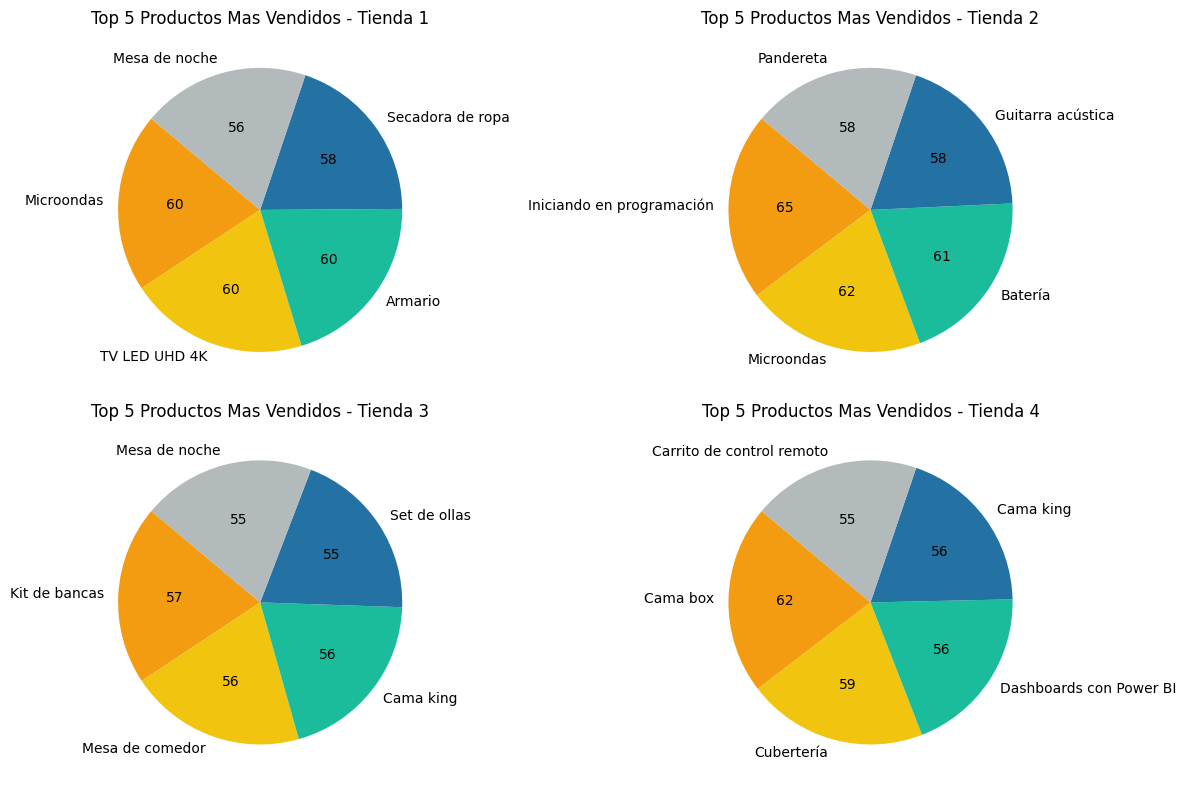

In [185]:
import matplotlib.pyplot as plt

colors = ['#f39c12', '#f1c40f', '#1abc9c', '#2471a3', '#b2babb']

def mostrar_valor(pct, valores):
    total = sum(valores)
    valor = int(round(pct * total / 100.0))
    return f"{valor}"

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].pie(Top5_T1.values, labels=Top5_T1.index,
              autopct=lambda pct: mostrar_valor(pct, Top5_T1.values),
              colors=colors, startangle=140)
axs[0, 0].set_title("Top 5 Productos Mas Vendidos - Tienda 1")

axs[0, 1].pie(Top5_T2.values, labels=Top5_T2.index,
              autopct=lambda pct: mostrar_valor(pct, Top5_T2.values),
              colors=colors, startangle=140)
axs[0, 1].set_title("Top 5 Productos Mas Vendidos - Tienda 2")

axs[1, 0].pie(Top5_T3.values, labels=Top5_T3.index,
              autopct=lambda pct: mostrar_valor(pct, Top5_T3.values),
              colors=colors, startangle=140)
axs[1, 0].set_title("Top 5 Productos Mas Vendidos - Tienda 3")

axs[1, 1].pie(Top5_T4.values, labels=Top5_T4.index,
              autopct=lambda pct: mostrar_valor(pct, Top5_T4.values),
              colors=colors, startangle=140)
axs[1, 1].set_title("Top 5 Productos Mas Vendidos - Tienda 4")

plt.tight_layout()
plt.savefig("Top5_Tiendas.png", dpi=300)
plt.show()

In [180]:
NoTop5_T1 = productosVebndidosT1.tail(5)
NoTop5_T2 = productosVebndidosT2.tail(5)
NoTop5_T3 = productosVebndidosT3.tail(5)
NoTop5_T4 = productosVebndidosT4.tail(5)

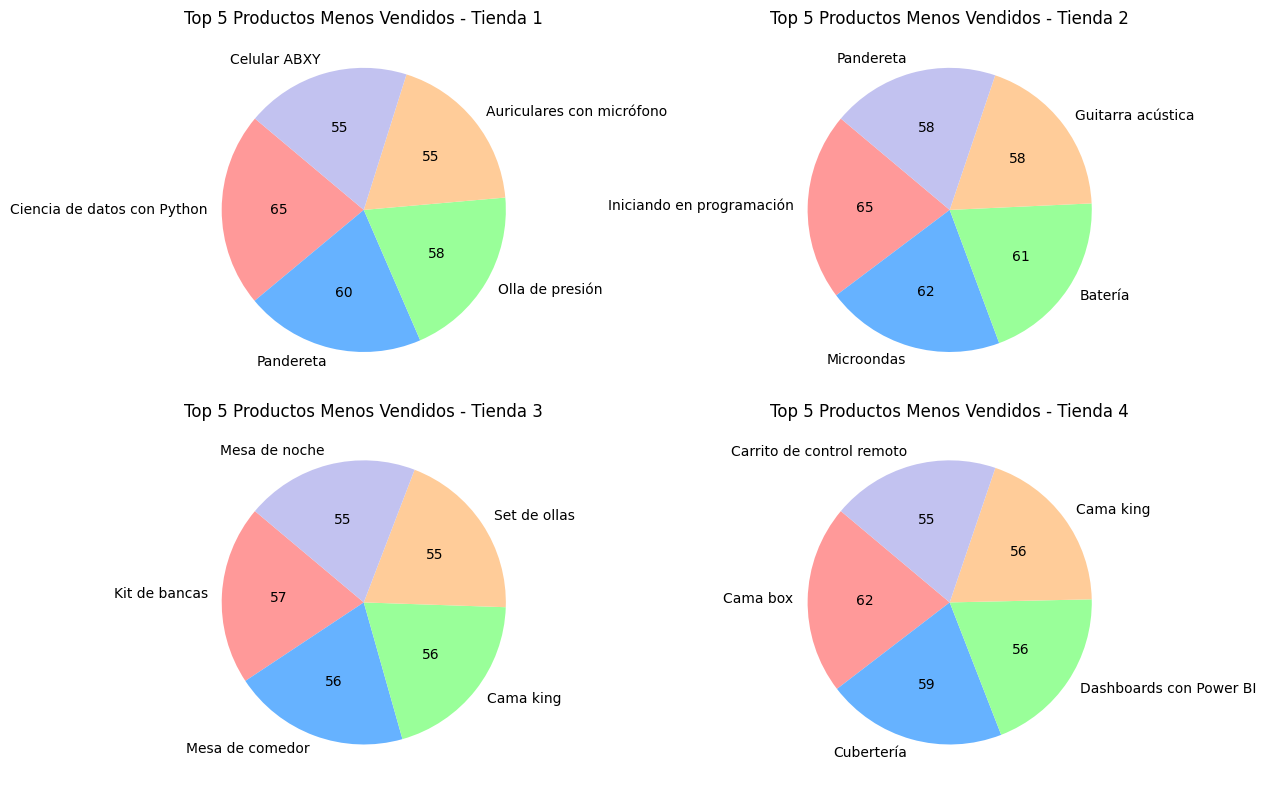

In [181]:
import matplotlib.pyplot as plt

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0']

def mostrar_valor(pct, valores):
    total = sum(valores)
    valor = int(round(pct * total / 100.0))
    return f"{valor}"

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].pie(NoTop5_T1.values, labels=NoTop5_T1.index,
              autopct=lambda pct: mostrar_valor(pct, Top5_T1.values),
              colors=colors, startangle=140)
axs[0, 0].set_title("Top 5 Productos Menos Vendidos - Tienda 1")

axs[0, 1].pie(NoTop5_T2.values, labels=NoTop5_T2.index,
              autopct=lambda pct: mostrar_valor(pct, Top5_T2.values),
              colors=colors, startangle=140)
axs[0, 1].set_title("Top 5 Productos Menos Vendidos - Tienda 2")

axs[1, 0].pie(NoTop5_T3.values, labels=NoTop5_T3.index,
              autopct=lambda pct: mostrar_valor(pct, Top5_T3.values),
              colors=colors, startangle=140)
axs[1, 0].set_title("Top 5 Productos Menos Vendidos - Tienda 3")

axs[1, 1].pie(NoTop5_T4.values, labels=NoTop5_T4.index,
              autopct=lambda pct: mostrar_valor(pct, Top5_T4.values),
              colors=colors, startangle=140)
axs[1, 1].set_title("Top 5 Productos Menos Vendidos - Tienda 4")

plt.tight_layout()
plt.savefig("NoTop5_Tiendas.png", dpi=300)
plt.show()

# 5. Envío promedio por tienda

In [237]:
costoEnvio_PromedioT1 =round(tienda["Costo de envío"].mean(),2)
costoEnvio_PromedioT2 =round(tienda2["Costo de envío"].mean(),2)
costoEnvio_PromedioT3 =round(tienda3["Costo de envío"].mean(),2)
costoEnvio_PromedioT4 =round(tienda4["Costo de envío"].mean(),2)
CostoPromedioEnvio = pd.DataFrame({
    "Tienda1": [costoEnvio_PromedioT1],
    "Tienda2": [costoEnvio_PromedioT2],
    "Tienda3": [costoEnvio_PromedioT3],
    "Tienda4": [costoEnvio_PromedioT4]
})

CostoPromedioEnvio

,Tienda1,Tienda2,Tienda3,Tienda4
0,26018.61,25216.24,24805.68,23459.46


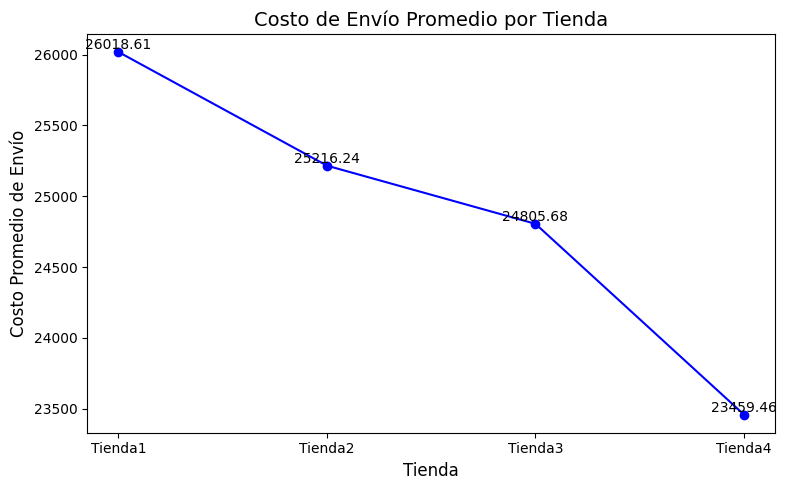

In [238]:
import matplotlib.pyplot as plt

# Crear gráfico de líneas
fig, ax = plt.subplots(figsize=(8, 5))

# Graficar la información (promedio de costo de envío por tienda)
ax.plot(CostoPromedioEnvio.columns, CostoPromedioEnvio.iloc[0], marker='o', linestyle='-', color='b')

# Título y etiquetas
ax.set_title("Costo de Envío Promedio por Tienda", fontsize=14)
ax.set_ylabel("Costo Promedio de Envío", fontsize=12)
ax.set_xlabel("Tienda", fontsize=12)

# Mostrar los valores en cada punto de la línea
for i, value in enumerate(CostoPromedioEnvio.iloc[0]):
    ax.text(CostoPromedioEnvio.columns[i], value, f"{value}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()